In [38]:
import pandas as pd
import seaborn as sns
import numpy
import matplotlib.pyplot as plt

sns.set_theme()

In [39]:
filename = "comparison"

In [40]:
results = pd.read_csv(f"../results/{filename}.csv")

### Best by score


In [41]:
def get_method_name(row):
    if row.classifier != "SVC":
        return row.classifier

    if "rbf" in row.classifier_params:
        return "SVC (RBF)"

    return "SVC (Linear)"

In [42]:
results["score"] = results.apply(
    lambda x: 10_000 * x.accuracy - 200 * x.n_features, axis=1
)

results["classifier"] = results.apply(get_method_name, axis=1)


best_by_score = (
    results.sort_values("score", ascending=False)
    .groupby(["feature_selector", "classifier", "n_features"])
    .first()
    .reset_index()
)[
    [
        "feature_selector",
        "classifier",
        "n_features",
        "accuracy",
        "accuracy_top_20pc",
        "score",
    ]
]

best_by_score.sort_values("score", ascending=False).head(10)

preliminary_clf = best_by_score[best_by_score["feature_selector"] == "SelectKBest"]
preliminary_fs = best_by_score[best_by_score["classifier"] == "RandomForestClassifier"]

plot_df = preliminary_clf

### Plots


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


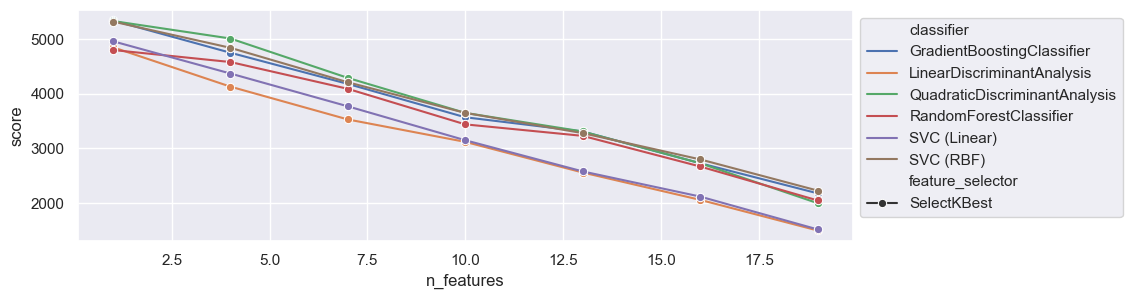

In [43]:
plt.figure(figsize=(10, 3))
ax = sns.lineplot(
    data=plot_df,
    x="n_features",
    y="score",
    hue="classifier",
    # style="classifier",
    style="feature_selector",
    # hue="feature_selector",
    markers=True,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig(f"../report/preliminary_clf.eps", bbox_inches="tight")

plt.show()

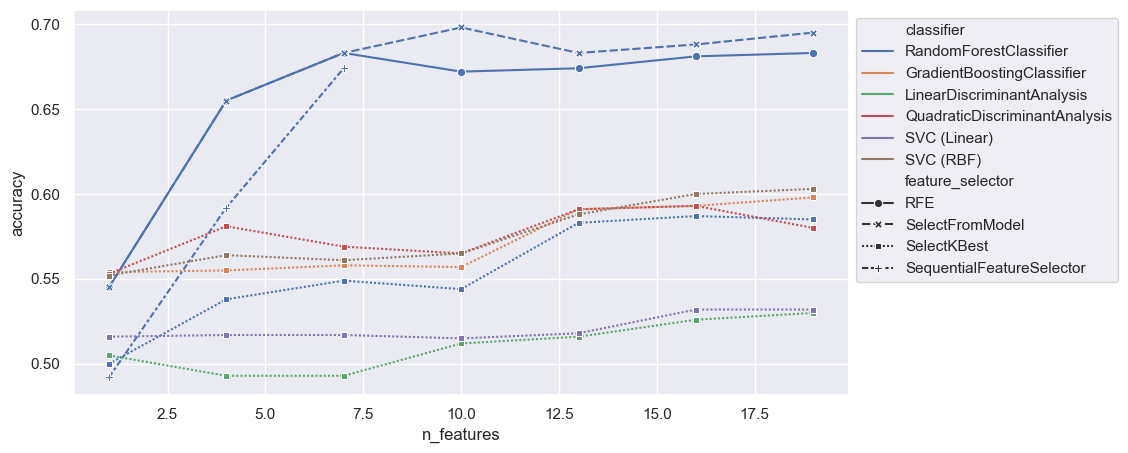

In [44]:
best_by_acc = (
    results.sort_values("accuracy", ascending=False)
    .groupby(["feature_selector", "classifier", "n_features"])
    .first()
    .reset_index()
)

plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    data=best_by_acc,
    x="n_features",
    y="accuracy",
    hue="classifier",
    style="feature_selector",
    markers=True,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

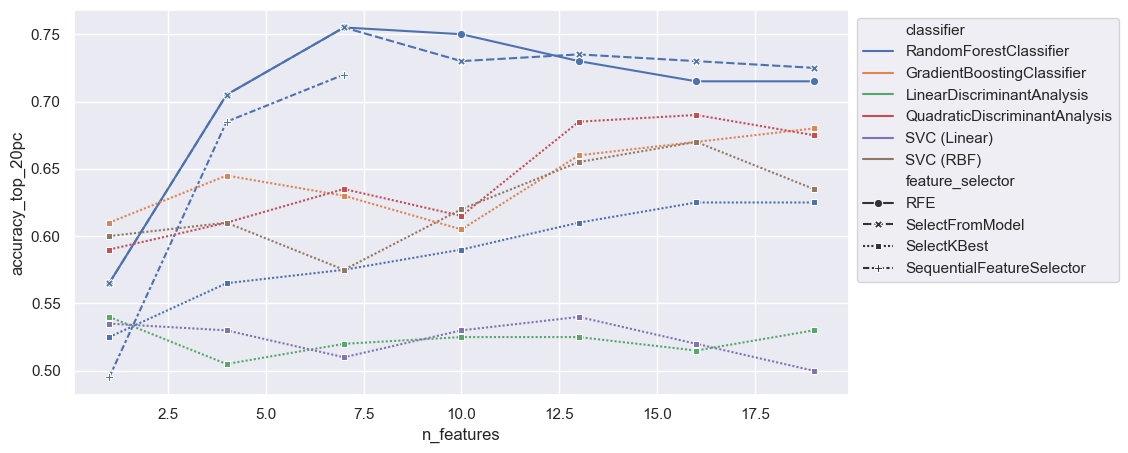

In [45]:
best_by_acc_top_20pc = (
    results.sort_values("accuracy_top_20pc", ascending=False)
    .groupby(["feature_selector", "classifier", "n_features"])
    .first()
    .reset_index()
)

plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    data=best_by_acc_top_20pc,
    x="n_features",
    y="accuracy_top_20pc",
    hue="classifier",
    style="feature_selector",
    markers=True,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()